In [111]:
library(ISLR)
library(MASS)
library(plyr)
library(ggplot2)

## Stock market data

In [112]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [113]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [114]:
train <- Smarket$Year < 2005

In [115]:
train[0:10]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [116]:
head(Smarket, 10)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [117]:
dim(Smarket)

[1] 1250    9

In [118]:
Smarket.2005 <- Smarket[!train,]

head(Smarket.2005, 10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down
1004,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.4779,0.342,Up
1005,2005,0.342,-0.143,0.351,-0.363,-1.167,1.4904,-0.610,Down
1006,2005,-0.610,0.342,-0.143,0.351,-0.363,1.4888,0.398,Up
1007,2005,0.398,-0.610,0.342,-0.143,0.351,1.5621,-0.863,Down
1008,2005,-0.863,0.398,-0.610,0.342,-0.143,1.5103,0.600,Up


In [119]:
dim(Smarket.2005)

[1] 252   9

In [120]:
Direction.2005 <- Smarket$Direction[!train]

Direction.2005[0:10]

[1] Down Down Down Up   Down Up   Down Up   Down Up  
Levels: Down Up

In [121]:
lda.fit <- lda(Direction ~ Lag1 + Lag2, 
                  data = Smarket, 
                  subset = train)

In [122]:
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

The model output indicates that $\hat{π}_1$ = 0.492 and $\hat{π}_2$ = 0.508. 
In other words,  49.2% of the training observations correspond to days during which the market went down. 
The group means are the average of each predictor within each class, 
and are used by LDA as estimates of μk. 
These suggest that there is a tendency for previous 2 days’ returns to be negative on days when the market 
increases and a tendency for the previous 2 days’ returns to be positive on days when the market declines. 

The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. 
In essence, these coefficients map the data onto a line to form the decision space.
If (`−0.642×Lag1−0.514×Lag2`) is large, then the LDA classifier will predict a market increase, 
and if it is small, then the LDA classifier will predict a market decline. 

Below, the first plot is for observations where market went down and second plot observations show market went up.  

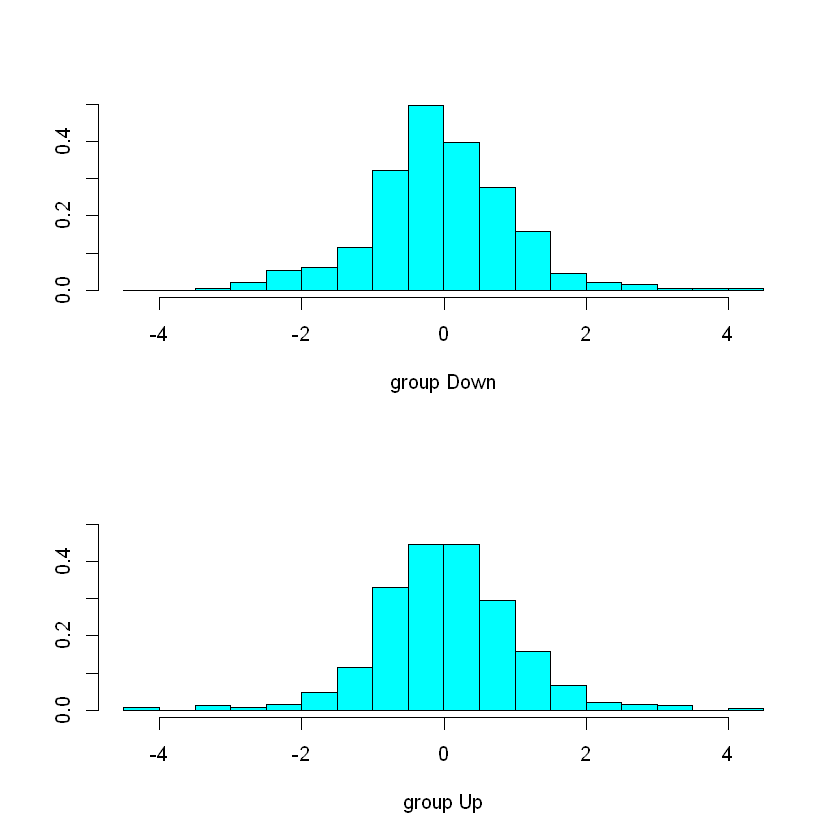

In [123]:
plot(lda.fit)

The `plot()` function produces plots of the linear discriminants, 
obtained by computing (`−0.642 × Lag1 − 0.514 × Lag2`) for each of the training observations. 
The horizontal axis is the linear combination of Lag1 and Lag2. 
Both the groups are centered on 0, and have similar spread, which means there is nothing that distinguishes these two groups. 
The prediction error will be close to 50%, 
which indicates that you cannot distinguish between the groups. 
The range of x-axis (-4 to 4) represents the range of Lag1 and Lag2. 

The `predict()` function returns a list with three elements. 
The first element, class, contains LDA’s predictions about the movement of the market. 
The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class. 
Finally, x contains the linear discriminants.


In [124]:
lda.pred <- predict(lda.fit, Smarket.2005)

In [125]:
names(lda.pred)

[1] "class"     "posterior" "x"

In [126]:
lda.class <- lda.pred$class
lda.class

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
 [16] Up   Up   Down Up   Up   Down Down Down Up   Down Down Up   Up   Up   Down
 [31] Down Up   Up   Up   Up   Up   Up   Down Down Up   Up   Up   Up   Down Down
 [46] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up  
 [61] Down Down Up   Up   Down Down Down Up   Up   Up   Up   Up   Up   Up   Down
 [76] Up   Down Down Up   Up   Up   Up   Up   Down Up   Down Down Up   Up   Up  
 [91] Up   Up   Up   Down Down Down Down Up   Up   Up   Up   Up   Down Up   Up  
[106] Down Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[121] Up   Up   Up   Down Down Up   Up   Down Up   Up   Down Down Down Up   Up  
[136] Up   Up   Up   Down Up   Up   Up   Up   Down Down Up   Up   Down Down Up  
[151] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up  
[166] Up   Up   Up   Down Down Up   Down Down Up   Up   Up   Up   Up   Up   Down
[181] Up   Up   Up   Up   Up   Up   Up   Up   Down Down Up   Up   Up   Up   Up  
[196] Up   Up   Up   Up   Down Down Up   Down Up   Up   Down Down Up   Up   Down
[211] Down Up   Down Down Up   Up   Up   Up   Down Down Up   Up   Up   Down Down
[226] Down Down Down Up   Up   Up   Up   Down Down Up   Up   Up   Up   Up   Up  
[241] Down Down Up   Up   Up   Up   Up   Down Up   Up   Up   Up  
Levels: Down Up

In [127]:
confusion <- table(lda.class, Direction.2005)
confusion

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

In [128]:
mean(lda.class == Direction.2005)

[1] 0.5595238

In [129]:
print (paste("accuracy = ", sum(diag(confusion)) / length(Direction.2005)))

[1] "accuracy =  0.55952380952381"


## Example with dummy data

In [130]:
points_data <- read.csv("datasets/data1.csv")

In [131]:
head(points_data)

X,Y,class
4.915895,3.312657,1
2.203087,2.762946,1
2.376347,2.273357,1
4.366696,2.682983,1
2.079594,2.194263,1
4.141328,3.377833,1


In [132]:
count(points_data, "class")

class,freq
-1,75
1,75


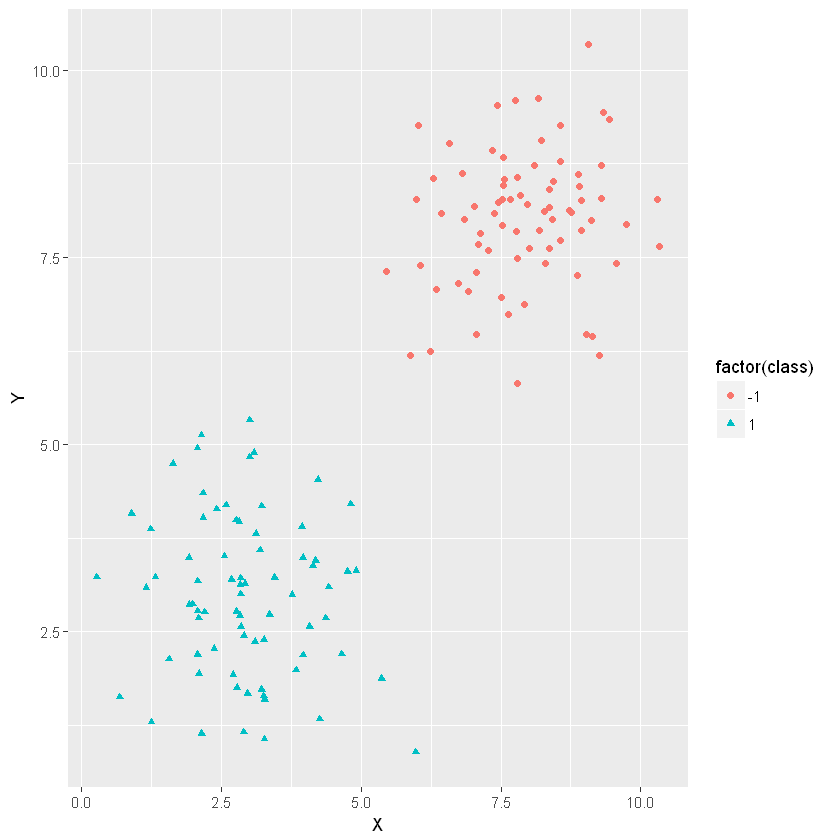

In [133]:
plot <- ggplot(points_data, aes(X, Y)) + 
    geom_point(aes(colour=factor(class),shape=factor(class)))

plot

In [134]:
ldafit <- lda(class ~ X + Y, data = points_data)

In [135]:
ldafit

Call:
lda(class ~ X + Y, data = points_data)

Prior probabilities of groups:
 -1   1 
0.5 0.5 

Group means:
          X        Y
-1 7.918329 8.011722
1  2.920857 2.989449

Coefficients of linear discriminants:
         LD1
X -0.6128911
Y -0.7542157

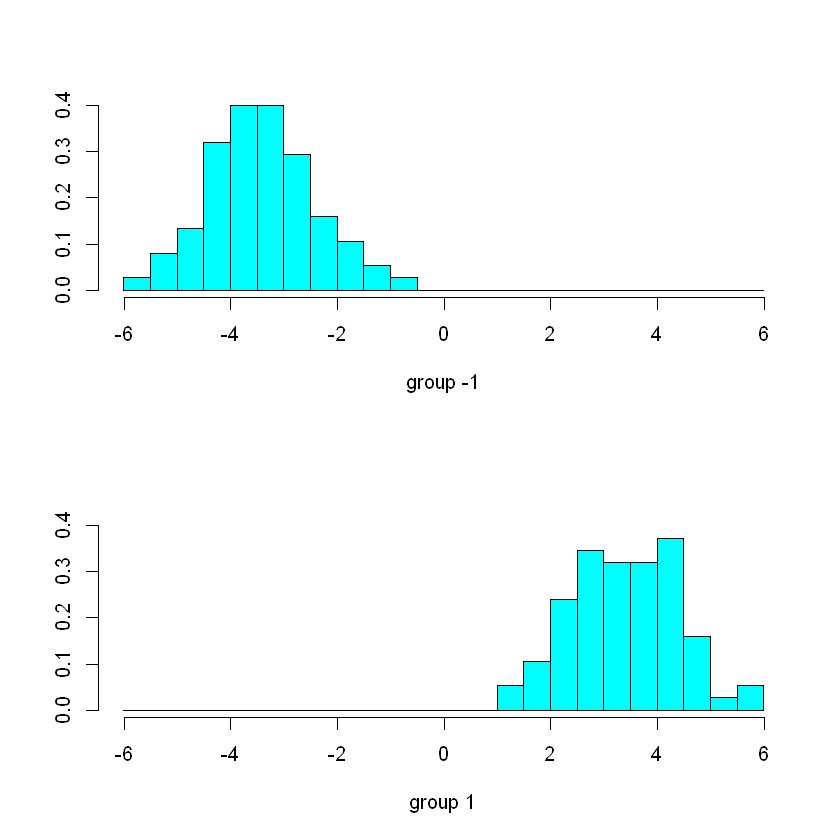

In [136]:
plot(ldafit)

In [137]:
pred <- predict(ldafit)

In [138]:
names(pred)

[1] "class"     "posterior" "x"

In [139]:
confusion_table <- table(pred$class, points_data$class)
confusion_table

    
     -1  1
  -1 75  0
  1   0 75

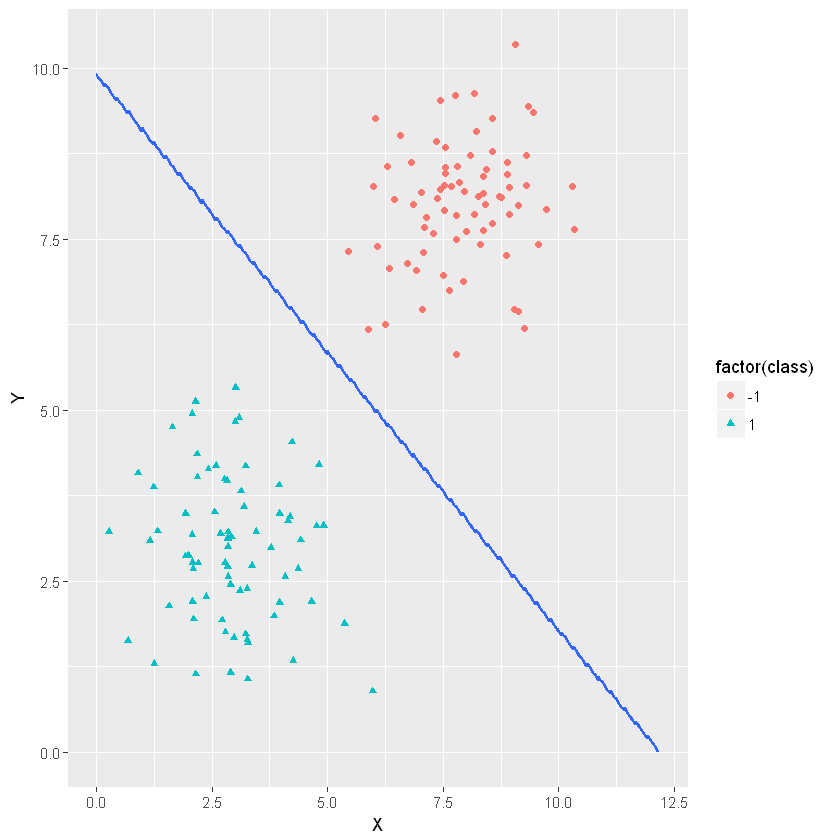

In [140]:
# plotting boundary.
contour_data <- data.frame(expand.grid(X=seq(0,15,length=300),Y=seq(0,15,length=300)))
lda_predict <- data.frame(contour_data, as.numeric(predict(ldafit,contour_data)$class))
names(lda_predict)[3] <- "pred"
plot + stat_contour(aes(x=X, y=Y, z=pred),data=lda_predict)